In [1]:
# %load_ext autoreload
# %autoreload 2
# import os
# from pathlib import Path

# print(Path().cwd())
# os.chdir(Path().cwd().parent)
# print(Path().cwd())

# Wavelet

In [2]:
# from pyquantus.utc.analysis import Hscan

# wavelet_params_1 = {
#     'order': 2, 
#     'fs': 30e6, 
#     'sigma': 0.11e-6, 
#     'wavelet_duration': 3e-6,
#     'visualize': True
# }

# wavelet_params_2 = {
#     'order': 8, 
#     'fs': 30e6, 
#     'sigma': 0.11e-6, 
#     'wavelet_duration': 3e-6,
#     'visualize': True
# }

# Hscan.GaussinaHermiteWavelet(**wavelet_params_1)
# Hscan.GaussinaHermiteWavelet(**wavelet_params_2)

# Read sample data

In [3]:
# from pyquantus.parse.clarius import ClariusParser

# rf_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw'
# rf_tgc_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
# info_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_rf.yml'

# data_obj = ClariusParser(rf_path, rf_tgc_path, info_path, visualize=True) # image = phantom for now

In [4]:
# signal_nd = data_obj.clarius_data_struct.rf
# print(signal_nd.shape)

# import numpy as np
# # Save signal_nd as a numpy array file
# np.save('signal_nd.npy', signal_nd)



In [5]:
import numpy as np

# Load the signal_nd from the saved numpy array file
signal_nd = np.load('signal_nd.npy')

print(signal_nd.shape)

signal_nd = signal_nd[:, 0:500 , :]

print(signal_nd.shape)


(34, 2928, 192)
(34, 500, 192)


# Hscan

In [6]:
from pyquantus.utc.analysis import Hscan

hscan_params = {
    'signal_nd': signal_nd,
    'signal_axis': 1,
    'wavelet_GHx_params_1': {
        'order': 2, 
        'fs': 30e6, 
        'sigma': 0.11e-6, 
        'wavelet_duration': 3e-6,
        'visualize': False
    },
    'wavelet_GHx_params_2': {
        'order': 8, 
        'fs': 30e6, 
        'sigma': 0.11e-6, 
        'wavelet_duration': 3e-6,
        'visualize': False
    }
}

hscan_obj = Hscan(**hscan_params)


2025-05-26 13:13:10,984 - INFO - Building time array...
2025-05-26 13:13:10,984 - INFO - Time array created with length: 90
2025-05-26 13:13:10,984 - INFO - Starting central frequency calculation.
2025-05-26 13:13:10,984 - INFO - Frequency with maximum amplitude: 3.00 MHz
2025-05-26 13:13:10,984 - INFO - Frequency with Maximum Amplitude: 3.00 MHz
2025-05-26 13:13:10,984 - INFO - Starting the plot process.
2025-05-26 13:13:10,984 - INFO - Visualization is disabled; no plots will be shown.
2025-05-26 13:13:10,997 - INFO - Building time array...
2025-05-26 13:13:10,997 - INFO - Time array created with length: 90
2025-05-26 13:13:10,999 - INFO - Starting central frequency calculation.
2025-05-26 13:13:11,000 - INFO - Frequency with maximum amplitude: 5.67 MHz
2025-05-26 13:13:11,000 - INFO - Frequency with Maximum Amplitude: 5.67 MHz
2025-05-26 13:13:11,000 - INFO - Starting the plot process.
2025-05-26 13:13:11,000 - INFO - Visualization is disabled; no plots will be shown.
2025-05-26 13:

In [7]:
print(hscan_obj.convolved_signal_with_ghx_1_nd.shape)
print(hscan_obj.convolved_signal_with_ghx_2_nd.shape)
print(hscan_obj.convolved_signal_with_ghx_1_envelope_nd.shape)
print(hscan_obj.convolved_signal_with_ghx_2_envelope_nd.shape)


(34, 500, 192)
(34, 500, 192)
(34, 500, 192)
(34, 500, 192)


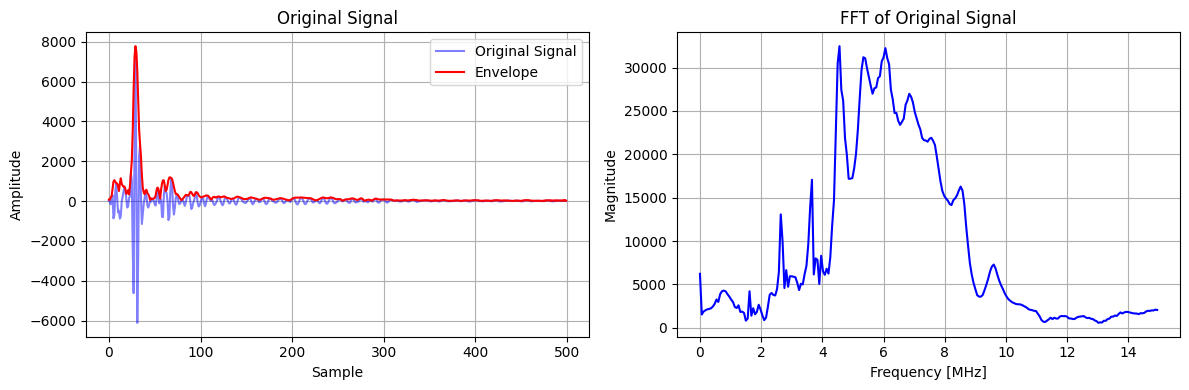

2025-05-26 13:13:11,973 - INFO - Starting the plot process.
2025-05-26 13:13:11,982 - INFO - Visualization is enabled.
2025-05-26 13:13:11,984 - INFO - Figure created with size 12x4.
2025-05-26 13:13:11,987 - INFO - Time shifted to positive values.
2025-05-26 13:13:11,992 - INFO - Hermite wavelet plot created with time scaled to microseconds.
2025-05-26 13:13:11,996 - INFO - Starting FFT calculation.
2025-05-26 13:13:11,998 - INFO - FFT calculation completed.
2025-05-26 13:13:12,008 - INFO - Frequency response plot created.


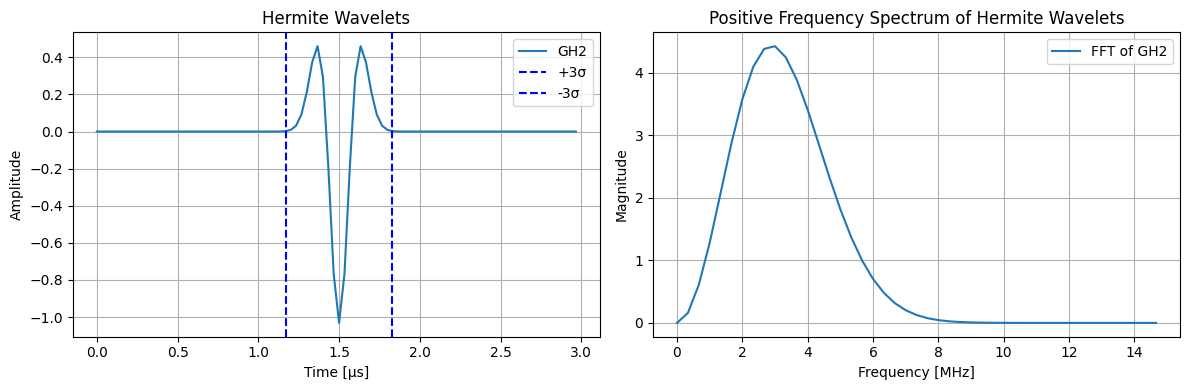

2025-05-26 13:13:12,268 - INFO - Plots displayed successfully.


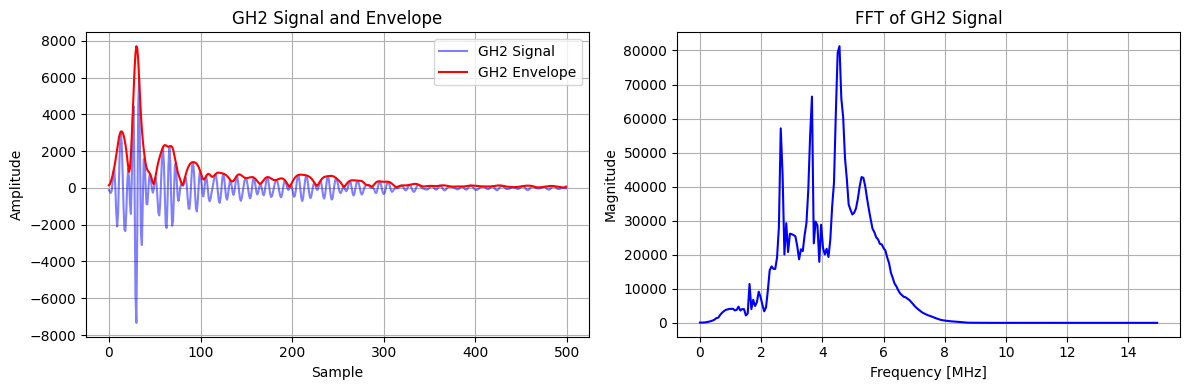

2025-05-26 13:13:12,495 - INFO - Starting the plot process.
2025-05-26 13:13:12,496 - INFO - Visualization is enabled.
2025-05-26 13:13:12,496 - INFO - Figure created with size 12x4.
2025-05-26 13:13:12,504 - INFO - Time shifted to positive values.
2025-05-26 13:13:12,508 - INFO - Hermite wavelet plot created with time scaled to microseconds.
2025-05-26 13:13:12,508 - INFO - Starting FFT calculation.
2025-05-26 13:13:12,508 - INFO - FFT calculation completed.
2025-05-26 13:13:12,517 - INFO - Frequency response plot created.


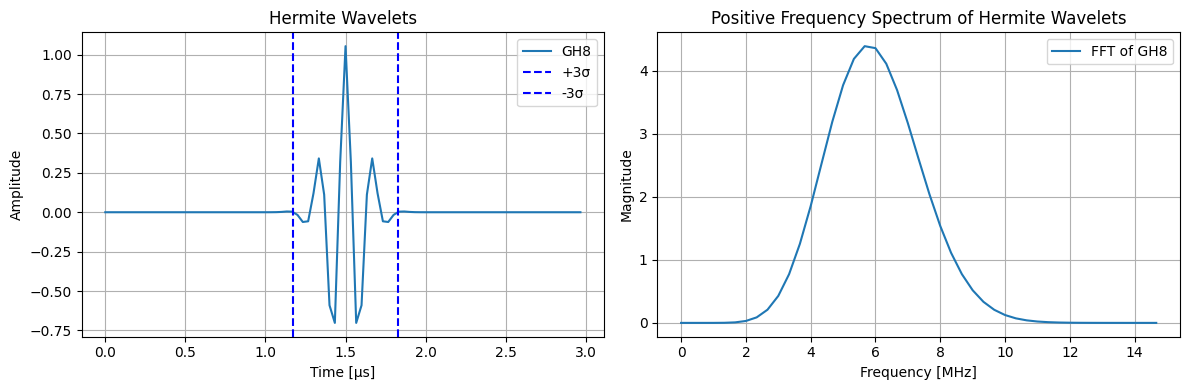

2025-05-26 13:13:12,728 - INFO - Plots displayed successfully.


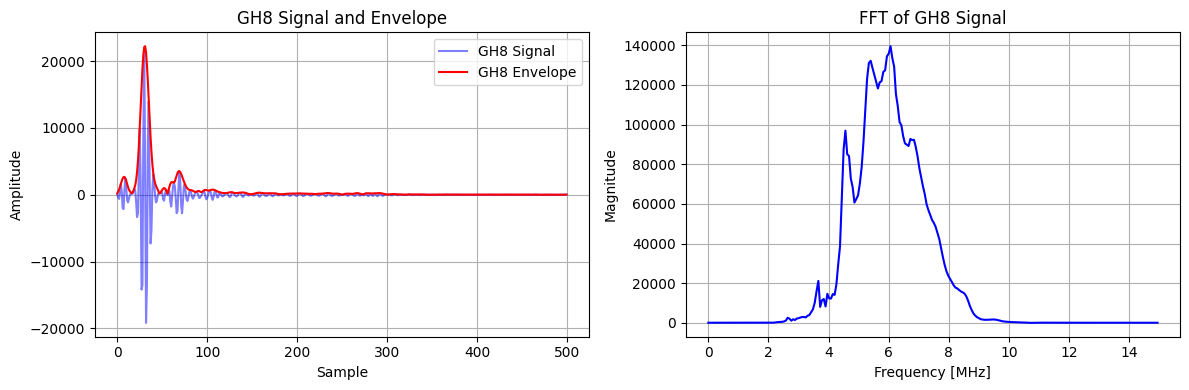

In [8]:
from pyquantus.utc.results import HscanPostProcessing

HscanPostProcessing(hscan_obj)